## Аналитика в авиакомпании

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><span><a href="#backstory" data-toc-modified-id="backstory-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>backstory</a></span></li><li><span><a href="#Описание-данных-и-задачи-проекта" data-toc-modified-id="Описание-данных-и-задачи-проекта-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание данных и задачи проекта</a></span></li></ul></li><li><span><a href="#Аналитика" data-toc-modified-id="Аналитика-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Аналитика</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Визуализируем-данные" data-toc-modified-id="Визуализируем-данные-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Визуализируем данные</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></div>

## Описание проекта

### backstory

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

### Описание данных и задачи проекта

**Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


## Аналитика

### Загрузка данных

Подгрузка необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

Подгрузка и осмотр данных

In [2]:
model_df = pd.read_csv('/datasets/query_1.csv')
model_df.info()
model_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


По осмотру данных результата первого запроса:
- 8 строк и 2 столбца
- Нет пропусков

In [3]:
city_df = pd.read_csv('/datasets/query_3.csv')
city_df.info()
city_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


По осмотру данных результата третьего запроса:
- 101 строка и 2 столбца
- Нет пропусков

In [4]:
festival_df = pd.read_csv('/datasets/query_last.csv')
festival_df.info()
festival_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


По осмотру данных результата последнего запроса:
- 10 строк и 4 столбца
- Указаны 3 фестиваля и в остальных неделях нет фестивалей

Из условия задачи известно, что average_flights - это среднее количество рейсов, прибывающих в город за день в сентябре 2018 года, мы можем найти примерное количество рейсов в день, умножив среднее количестов на 30

In [5]:
city_df['number_of_flights'] = city_df['average_flights'] * 30

Выберем топ 10 городов по количеству рейсов

In [6]:
top_cities = city_df.sort_values(by='average_flights', ascending=False).head(10)
top_cities

,city,average_flights,number_of_flights
43,Москва,129.774194,3893.225806
70,Санкт-Петербург,31.161290,934.838710
54,Новосибирск,17.322581,519.677419
33,Красноярск,11.580645,347.419355
20,Екатеринбург,11.322581,339.677419
67,Ростов-на-Дону,10.193548,305.806452
63,Пермь,10.129032,303.870968
10,Брянск,10.000000,300.000000
74,Сочи,9.612903,288.387097
84,Ульяновск,9.580645,287.419355


### Визуализируем данные

Начнем с осмотра распределения по моделям самолётов и количеству рейсов

Text(0.5, 1.0, 'Модели самолетов по количеству рейсов')

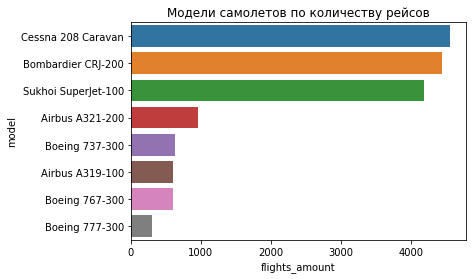

In [7]:
(sns.barplot(x = 'flights_amount', y = 'model', data = model_df.sort_values(by='flights_amount', ascending=False))
            .set_title('Модели самолетов по количеству рейсов'))

По городам и количеству рейсов

Text(0.5, 1.0, 'По городам и количеству рейсов')

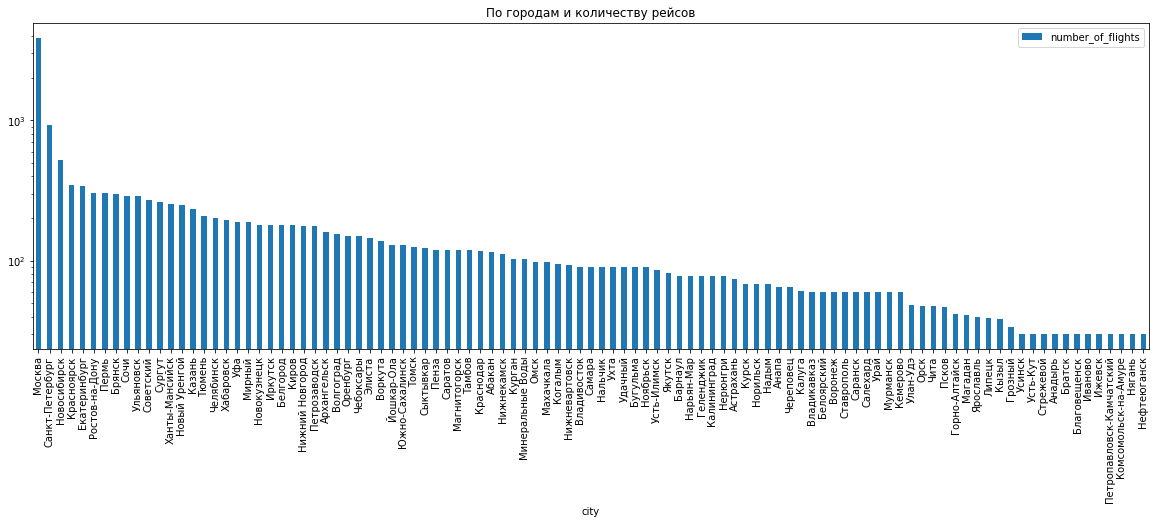

In [8]:
(city_df.sort_values(by = 'number_of_flights', ascending = False)
                    .plot(x ='city', y='number_of_flights', kind = 'bar', figsize  = (20, 6), logy = True))
plt.title('По городам и количеству рейсов', fontsize=12)

Все просто, чем больше население города тем больше авиарейсов выполняется 

Text(0.5, 1.0, 'Топ 10 городов по усредненым рейсам')

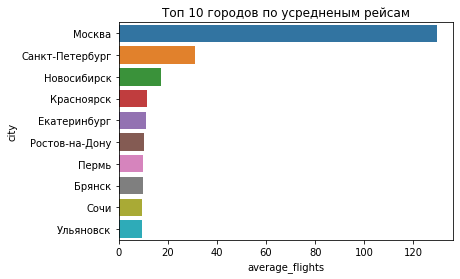

In [9]:
(sns.barplot(x = 'average_flights', y = 'city', data = city_df.sort_values(by='average_flights', ascending=False).head(10))
     .set_title('Топ 10 городов по усредненым рейсам'))

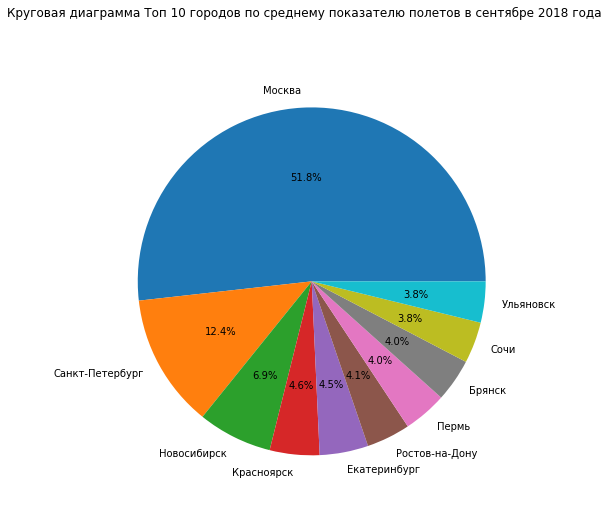

In [10]:
plt.figure(figsize=(8,8))
plt.pie(top_cities.average_flights, labels=top_cities.city, autopct='%.1f%%')
plt.suptitle('Круговая диаграмма Топ 10 городов по среднему показателю полетов в сентябре 2018 года', fontsize=12);

Больше половины авиарейсов приходится на столицу.

### Вывод

По результатам осмотра данных можно сделать следующие выводы:
- Самые популярные города для перелётов: Москва, Санкт-Петербург, Новосибирск
- Самые популярные модели самолетов для перелётов: Cessna 208 Caravan 4557, Bombardier CRJ-200, Sukhoi SuperJet-100